   target               a         b   c                  d          e  \
0     0.0  lv hypertrophy  0.531368  63       fixed defect  Cleveland   
1     1.0  lv hypertrophy -1.056253  67             normal  Cleveland   
2     1.0  lv hypertrophy  0.438407  67  reversable defect  Cleveland   
3     0.0          normal -1.413430  37             normal  Cleveland   
4     0.0  lv hypertrophy -1.347216  41             normal  Cleveland   

          f                g      h      i  ...          r       s    t  \
0  0.285812   typical angina  233.0   True  ...  60.627689    Male  2.3   
1  1.660947     asymptomatic  286.0  False  ...  65.225088    Male  1.5   
2 -0.305235     asymptomatic  229.0  False  ...  66.956699    Male  2.6   
3  0.887054      non-anginal  250.0  False  ...  37.160246    Male  3.5   
4 -0.558037  atypical angina  204.0  False  ...  41.359067  Female  1.4   

           u      v         w    x          y   z      {  
0  62.306825  145.0 -1.007833  0.0  61.730527 NaN  

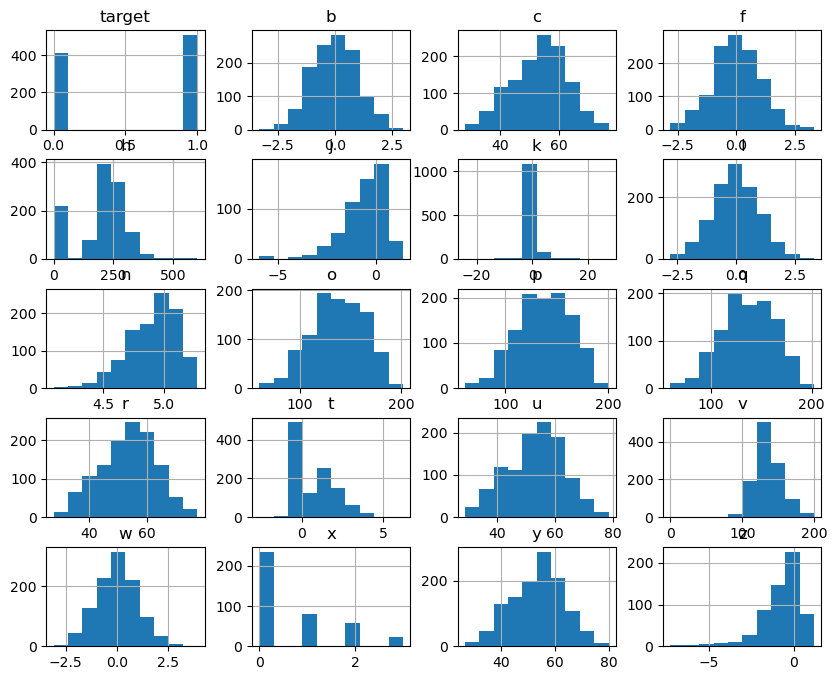

target    0
a         0
b         0
c         0
d         0
e         0
f         0
g         0
h         0
i         0
j         0
k         0
l         0
m         0
n         0
o         0
p         0
q         0
r         0
s         0
t         0
u         0
v         0
w         0
x         0
y         0
z         0
{         0
dtype: int64
(1196, 28)
   target               a         b         c                  d          e  \
0     0.0  lv hypertrophy  0.610389  0.714286       fixed defect  Cleveland   
1     1.0  lv hypertrophy  0.358036  0.795918             normal  Cleveland   
2     1.0  lv hypertrophy  0.595613  0.795918  reversable defect  Cleveland   
3     0.0          normal  0.301262  0.183673             normal  Cleveland   
4     0.0  lv hypertrophy  0.311787  0.265306             normal  Cleveland   

          f                g         h      i  ...         r       s  \
0  0.505577   typical angina  0.386401   True  ...  0.662431    Male   
1  0.729423     asymp

/Users/rhythm/Desktop/Assignment1ML/Assignment1/Scripts/data_preprocessor.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(fill_value, inplace=True)
/Users/rhythm/Desktop/Assignment1ML/Assignment1/Scripts/data_preprocessor.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column]

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('./Scripts')

from data_preprocessor import (
    impute_missing_values,
    remove_duplicates,
    normalize_data,
    remove_redundant_features
)

data = pd.read_csv('messy_data.csv')
print(data.head())
print(data.info())
print(data.describe())

data.hist(figsize=(10, 8))
plt.show()

imputed_data = impute_missing_values(data, strategy='mean')
print(imputed_data.isnull().sum())

deduped_data = remove_duplicates(imputed_data)
print(deduped_data.shape)

normalized_data = normalize_data(deduped_data, method='minmax')
print(normalized_data.head())

final_data = remove_redundant_features(normalized_data, threshold=0.9)
print(final_data.head())

final_data.to_csv('cleaned_data.csv', index=False)
print("✅ Cleaned data saved!")


In [11]:
import importlib
import data_preprocessor
importlib.reload(data_preprocessor)

from data_preprocessor import remove_redundant_features
final_data = remove_redundant_features(normalized_data, threshold=0.9)
print(final_data.head())


   target               a         b         c                  d          e  \
0     0.0  lv hypertrophy  0.610389  0.714286       fixed defect  Cleveland   
1     1.0  lv hypertrophy  0.358036  0.795918             normal  Cleveland   
2     1.0  lv hypertrophy  0.595613  0.795918  reversable defect  Cleveland   
3     0.0          normal  0.301262  0.183673             normal  Cleveland   
4     0.0  lv hypertrophy  0.311787  0.265306             normal  Cleveland   

          f                g         h      i  ...         l            m  \
0  0.505577   typical angina  0.386401   True  ...  0.319166  downsloping   
1  0.729423     asymptomatic  0.474295  False  ...  0.412870         flat   
2  0.409365     asymptomatic  0.379768  False  ...  0.124036         flat   
3  0.603448      non-anginal  0.414594  False  ...  0.387424  downsloping   
4  0.368214  atypical angina  0.338308  False  ...  0.411798    upsloping   

          n       s         t      v         w         x      